In [1]:
#%%
#* Import the code needed
import os
from pathlib import Path
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#%%
#* Define paths
directory_path = Path('../../')

In [3]:
pop = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 'regression_Population.xlsx',
    index_col=0)

PpD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 'regression_PpD.xlsx',
    index_col=0)

TS_cj = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Type_Split' / 'Type_Split_ratios.xlsx',
    index_col=0)

lifetime = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime_standard_deviation = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime = lifetime.drop('std_dev', axis=1)
lifetime_standard_deviation = lifetime_standard_deviation.drop('lifetime', axis=1)

lifetime = lifetime.loc[:, 'lifetime'].to_numpy()
lifetime

lifetime_standard_deviation = lifetime_standard_deviation.loc[:, 'std_dev'].to_numpy()

In [4]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

from dynamic_stock_model import DynamicStockModel

In [5]:
stock_t = np.multiply(pop,PpD)

stock_t_SFH = np.multiply(stock_t,TS_cj['SFH_ratio'])
stock_t_TH = np.multiply(stock_t,TS_cj['TH_ratio'])
stock_t_AB = np.multiply(stock_t,TS_cj['AB_ratio'])

C:\Users\grace\AppData\Local\Temp\ipykernel_11724\669566578.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.multiply(pop,PpD)
C:\Users\grace\AppData\Local\Temp\ipykernel_11724\669566578.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array 

In [6]:
def stock_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock_t_SFH['Population'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = dwellings_stock_driven.i

    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow_t,
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s


In [7]:
s_c_SFH, s_SFH = stock_model(stock_t_SFH)
s_c_TH, s_TH = stock_model(stock_t_TH)
s_c_AB, s_AB = stock_model(stock_t_AB)

Text(0, 0.5, 'dwellings')

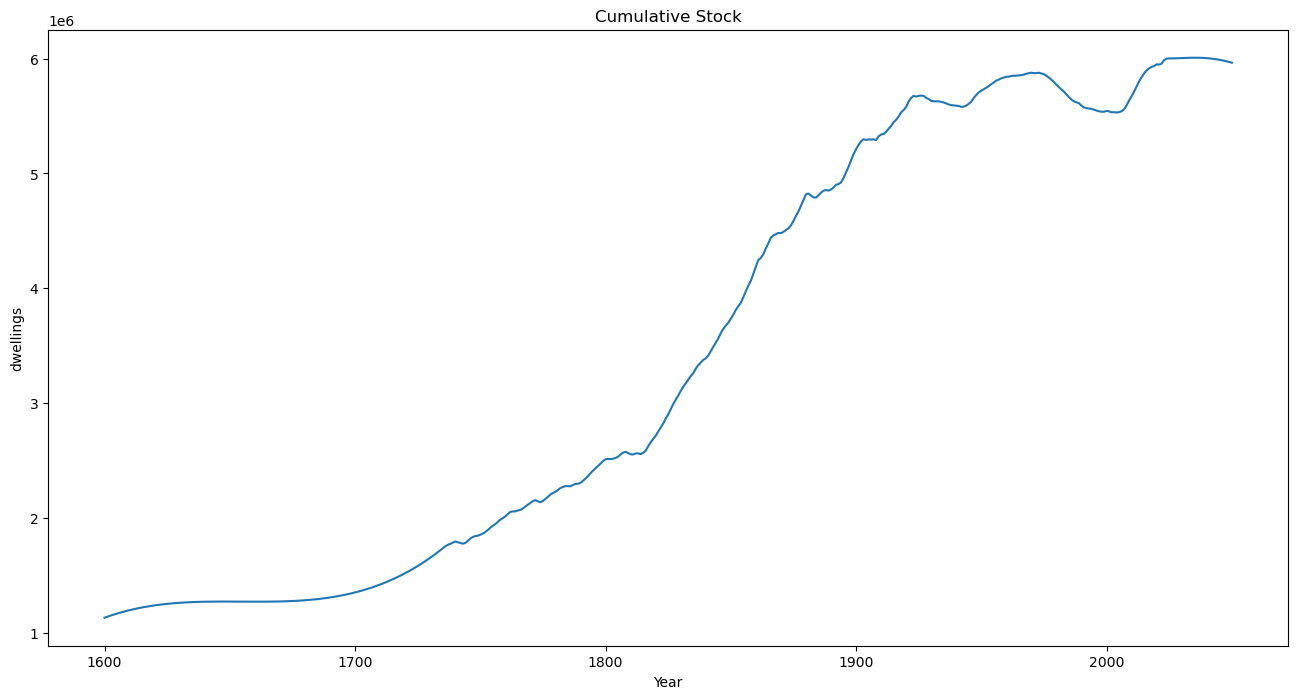

In [8]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_SFH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

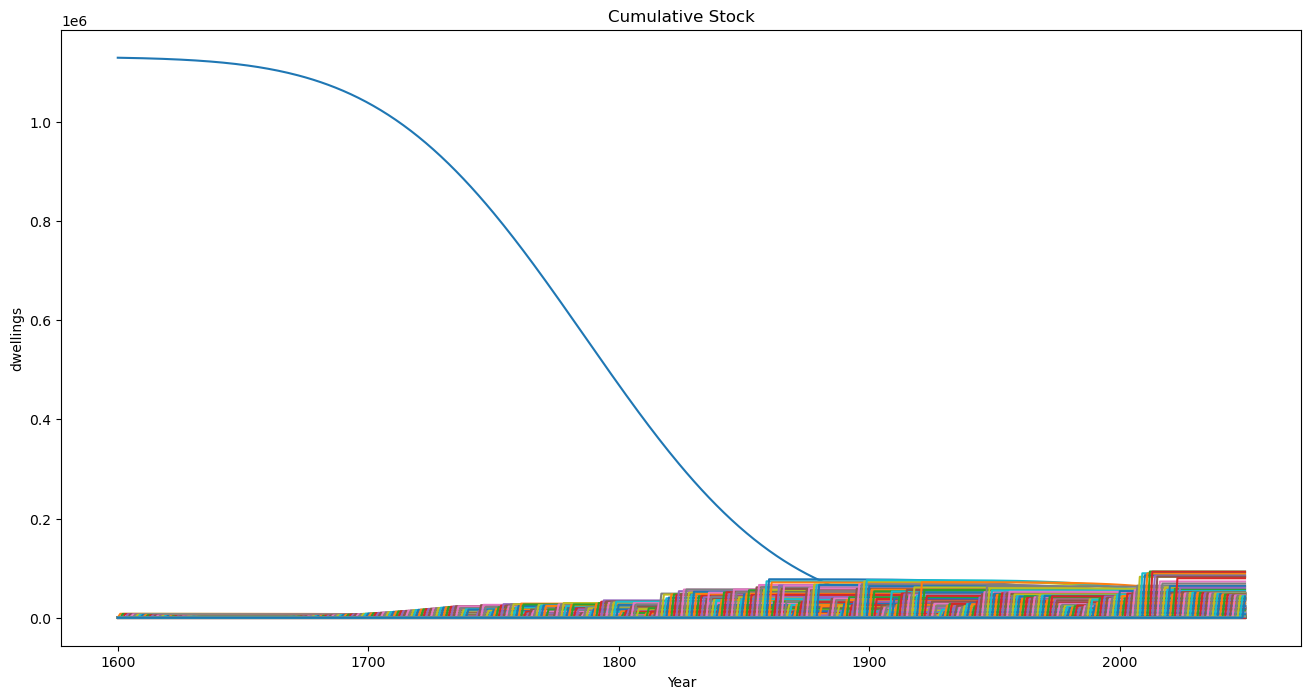

In [9]:
# Plot SFH stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_SFH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

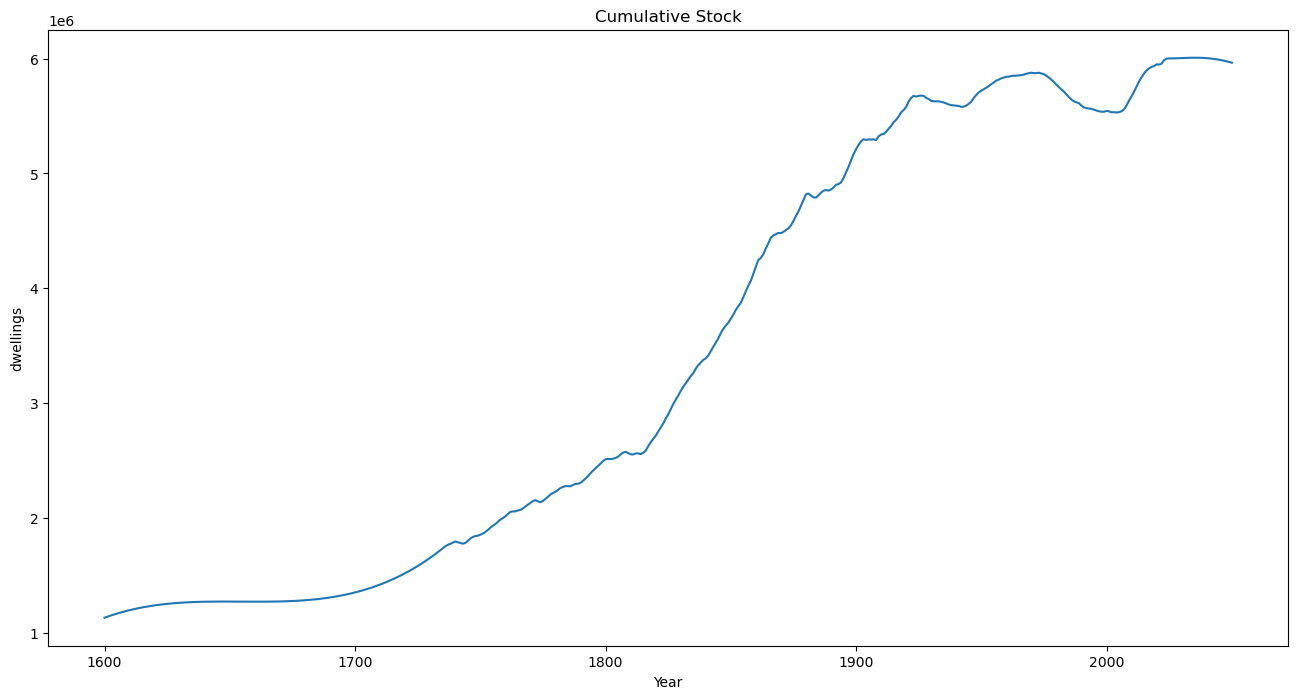

In [10]:
# Plot TH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_TH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

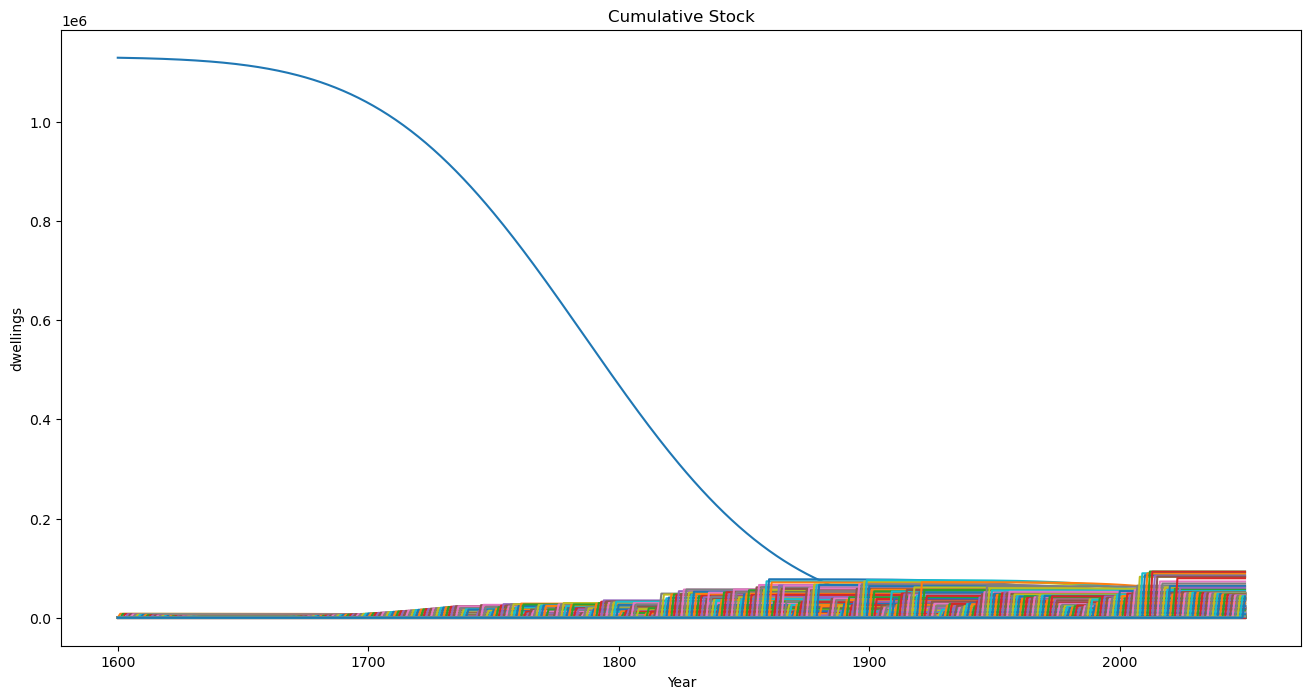

In [11]:
# Plot TH stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_TH)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

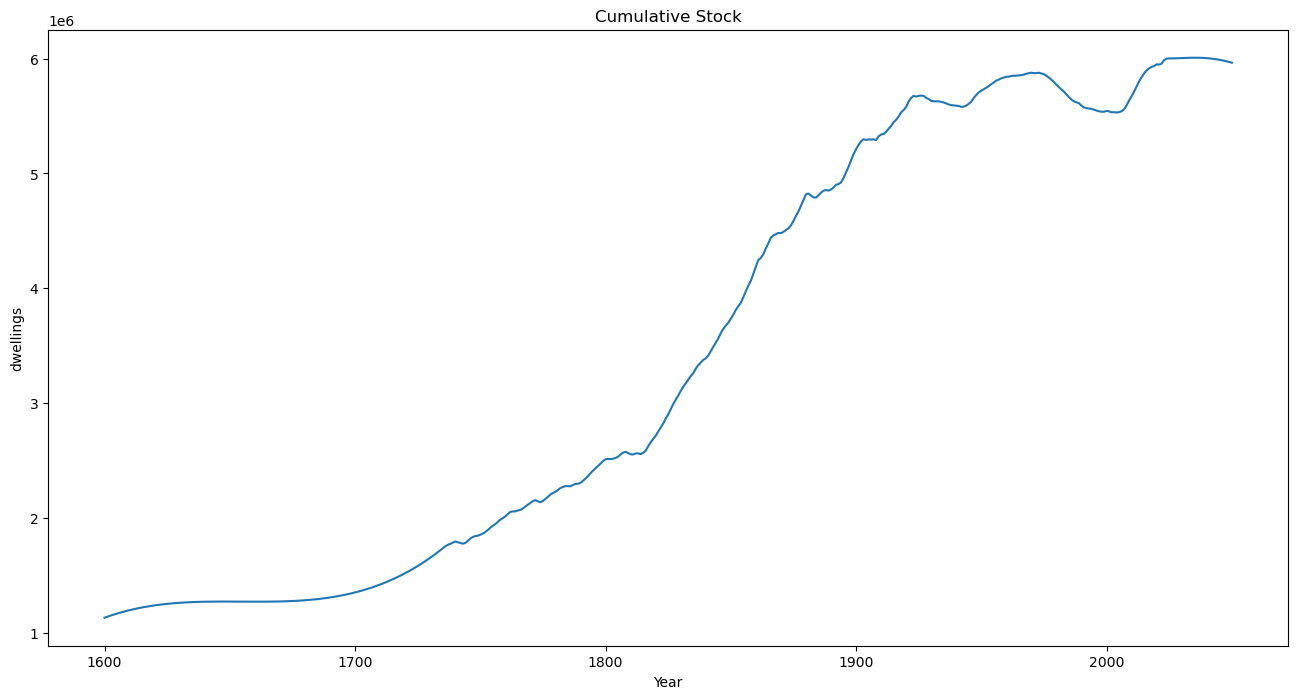

In [12]:
# Plot AB total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_AB)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

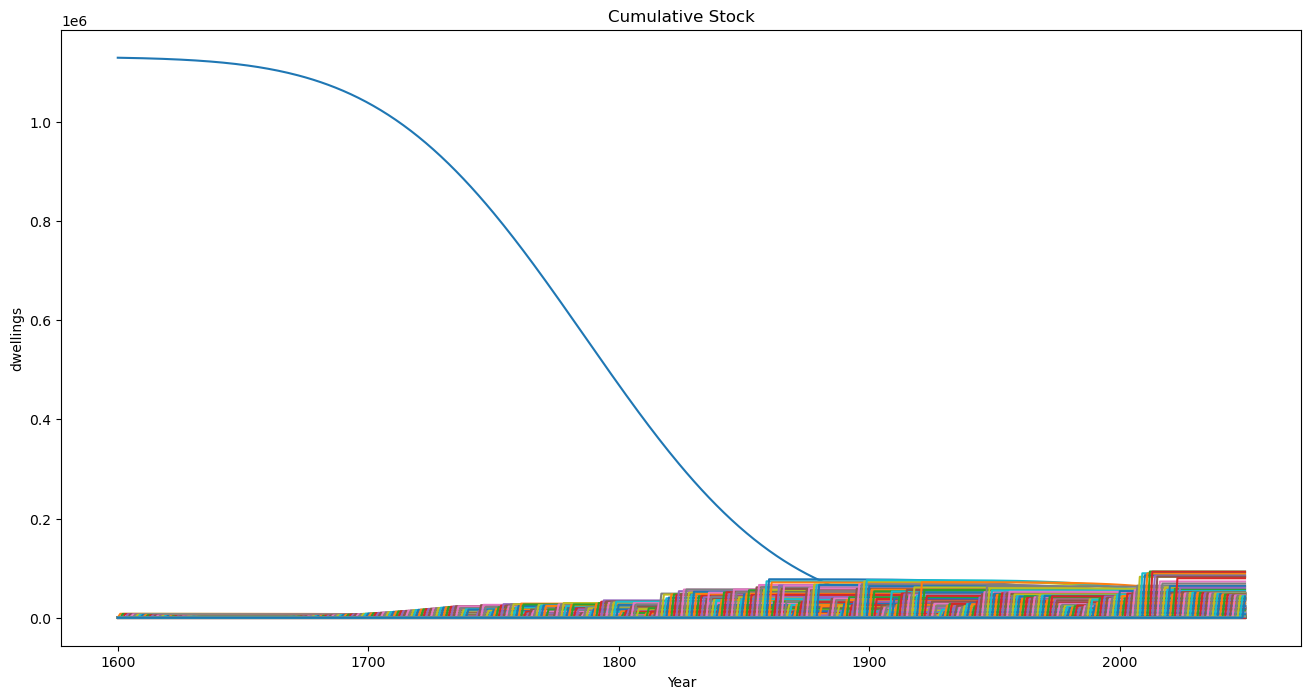

In [13]:
# Plot AB stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_AB)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

In [14]:
s_total = s_SFH + s_TH + s_AB

s_c_total = s_c_SFH + s_c_TH + s_c_AB

Text(0, 0.5, 'dwellings')

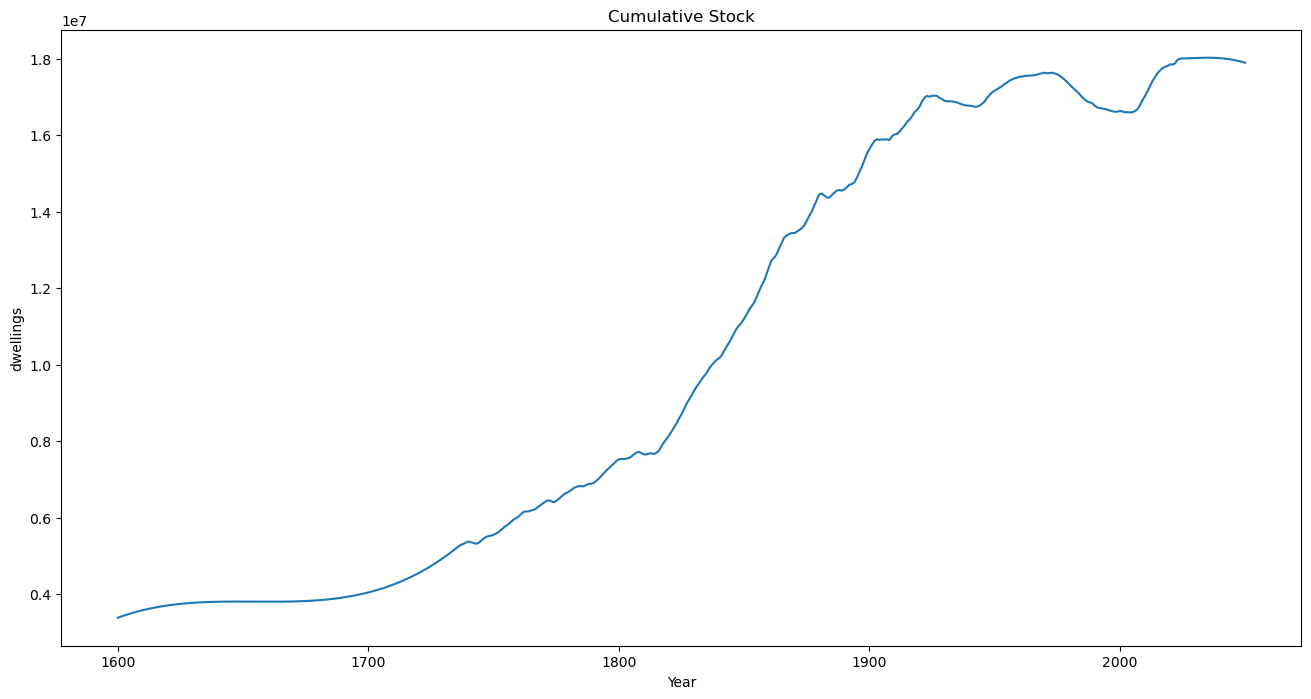

In [15]:
# Plot total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

Text(0, 0.5, 'dwellings')

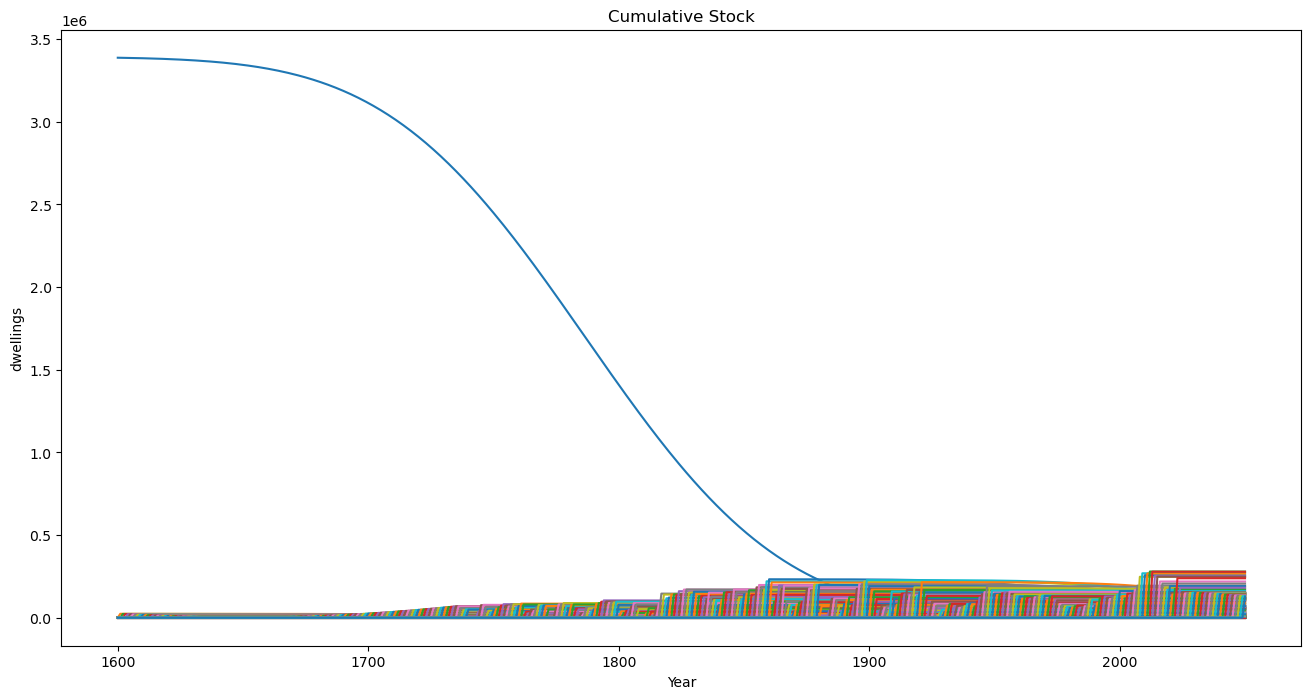

In [16]:
# Plot total stock by cohort
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_c_total)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')